# 2.4. 분류 예측의 불확실성 추정

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
import scipy
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [3]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)

y_named = np.array(["blue", "red"])[y]

X_train, X_test, y_train_named, y_test_named, y_train, y_test = \
    train_test_split(X, y_named, y, random_state=0)

그래디언트 부스팅 모델 생성

In [6]:
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(random_state=0)

## 2.4.1. 결정함수 

In [7]:
print("X_test.shape : ", X_test.shape)
print("결정 함수 결과 형태 : ", gbrt.decision_function(X_test).shape)

X_test.shape :  (25, 2)
결정 함수 결과 형태 :  (25,)


In [14]:
print("결정 함수 : \n", gbrt.decision_function(X_test)[:5])
print("임계치와 결정 함수 결과 비교 : \n", gbrt.decision_function(X_test) > 0)
print("예측 : \n", gbrt.predict(X_test))

결정 함수 : 
 [ 4.13592603 -1.70169917 -3.95106099 -3.62609552  4.28986642]
임계치와 결정 함수 결과 비교 : 
 [ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
예측 : 
 ['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


이진 분류에서 음성 클래스는 항상 classes_ 속성의 첫번째 원소, 양성 클래스는 항상 두번째 원소이다.

In [19]:
#bool값을 0과 1로 변환
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)
#classes_의 인덱스로 사용
pred = gbrt.classes_[greater_zero]

print("pred는 예측결과와 같다 : ", np.all(pred == gbrt.predict(X_test)))

pred는 예측결과와 같다 :  True


In [21]:
decision_function = gbrt.decision_function(X_test)
print("결정 함수 최솟값 : {:.2f} / 최댓값 : {:.2f}".format(np.min(decision_function), np.max(decision_function)))

결정 함수 최솟값 : -7.69 / 최댓값 : 4.29


결정함수의 범위가 임의의 값이라 이해하기는 어려움

#### 시각화

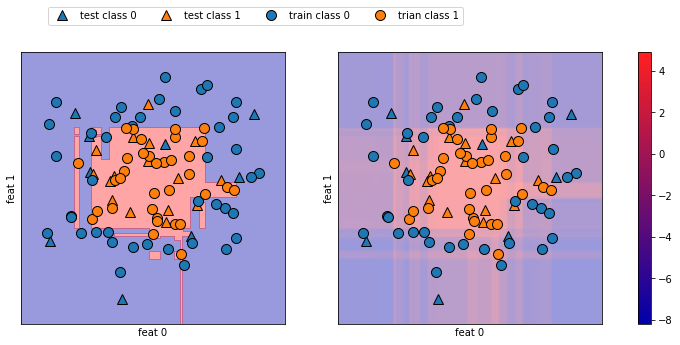

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4,fill=True, cm=mglearn.cm2)

scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.4, cm=mglearn.ReBl)

for ax in axes:
    """plot train & test point"""
    mglearn.discrete_scatter(X_test[:,0], X_test[:,1], y_test, markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train, markers='o', ax=ax)
    ax.set_xlabel("feat 0")
    ax.set_ylabel("feat 1")
    
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(["test class 0", "test class 1", "train class 0", "trian class 1"], ncol=4, loc=(.1,1.1))

## 2.4.2. 예측 확률

predict_proba : 각 클래스에 대한 확률 (n_samples, 2) 형태

In [27]:
print("shape of probability : ", gbrt.predict_proba(X_test).shape)

shape of probability :  (25, 2)


In [34]:
print("predict probability : \n", gbrt.predict_proba(X_test[:6]))

predict probability : 
 [[0.01573626 0.98426374]
 [0.84575653 0.15424347]
 [0.98112869 0.01887131]
 [0.97407033 0.02592967]
 [0.01352142 0.98647858]
 [0.02504637 0.97495363]]


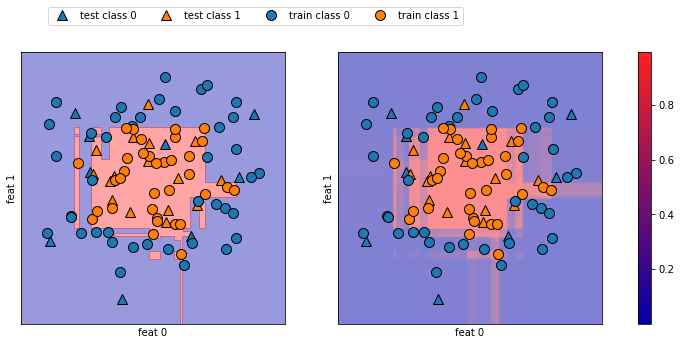

In [35]:
fig, axes = plt.subplots(1,2, figsize=(13, 5))

mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.5, cm=mglearn.ReBl, function='predict_proba')

for ax in axes:
    mglearn.discrete_scatter(X_test[:,0], X_test[:,1], y_test, markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train, markers='o', ax=ax)
    
    ax.set_xlabel("feat 0")
    ax.set_ylabel("feat 1")
    
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(["test class 0", "test class 1", "train class 0", "train class 1"], ncol=4, loc=(.1, 1.1))

## 2.4.3. 다중분류에서의 불확실성

In [39]:
from sklearn.datasets import load_iris

iris = load_iris()

X_train ,X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=42)

In [40]:
gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, random_state=0)

In [44]:
print("shape of Decision function : ", gbrt.decision_function(X_test).shape)
print("result of Decision function : \n", gbrt.decision_function(X_test)[:6])

shape of Decision function :  (38, 3)
result of Decision function : 
 [[-1.995715    0.04758267 -1.92720695]
 [ 0.06146394 -1.90755736 -1.92793758]
 [-1.99058203 -1.87637861  0.09686725]
 [-1.995715    0.04758267 -1.92720695]
 [-1.99730159 -0.13469108 -1.20341483]
 [ 0.06146394 -1.90755736 -1.92793758]]


shape of result = (n_samples, n_classes)

In [46]:
print("index of biggest function : \n", np.argmax(gbrt.decision_function(X_test), axis=1))
print("predict : \n", gbrt.predict(X_test))

index of biggest function : 
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
predict : 
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


#### probability

In [48]:
print("predict probability : \n", gbrt.predict_proba(X_test)[:6])
print("sum of probability : ", np.sum(gbrt.predict_proba(X_test)[:6], axis=1))

predict probability : 
 [[0.10217718 0.78840034 0.10942248]
 [0.78347147 0.10936745 0.10716108]
 [0.09818072 0.11005864 0.79176065]
 [0.10217718 0.78840034 0.10942248]
 [0.10360005 0.66723901 0.22916094]
 [0.78347147 0.10936745 0.10716108]]
sum of probability :  [1. 1. 1. 1. 1. 1.]


In [50]:
print("index of the most probabiltiy : ", np.argmax(gbrt.predict_proba(X_test), axis=1))
print("predict of the model : ", gbrt.predict(X_test))

index of the most probabiltiy :  [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
predict of the model :  [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [53]:
logreg = LogisticRegression(max_iter=1000)

# iris 데이터셋의 타깃을 클래스 이름으로 나타내기

named_target = iris.target_names[y_train]
logreg.fit(X_train, named_target)
print("classes in train data : ", logreg.classes_)
print("predict : ", logreg.predict(X_test)[:10])
argmax_dec_func = np.argmax(logreg.decision_function(X_test), axis=1)
print("index of biggest decision function : ", argmax_dec_func[:10])
print("match index with classes : ", logreg.classes_[argmax_dec_func][:10])

classes in train data :  ['setosa' 'versicolor' 'virginica']
predict :  ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
index of biggest decision function :  [1 0 2 1 1 0 1 2 1 1]
match index with classes :  ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
